### Module 3 Learning: Linear Regression as an example of Machine Learning
In this activity, become familiar with the concept of a mathematical model used to predict a value.  This concept will carry us forward to using more sophisticated machine learning models to predict increasingly complex data.<P>
    
References:<P>
- https://www.youtube.com/watch?v=b0L47BeklTE
-https://data36.com/linear-regression-in-python-numpy-polyfit/

In [1]:
from sklearn import datasets # We'll get a data set from this module
import pandas as pd # Used to store data in a DataFrame
import numpy as np # We will use the np linear model
import matplotlib.pyplot as plt # Visualization module
%matplotlib inline

### Get some data to work with

In [35]:
# Import an example dataset
# From: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
data = datasets.load_linnerud()
# Convert the data to a pandas DataFrame
df = pd.DataFrame(data=data.target, columns=data.target_names)
print('Size of data (Rows,Cols):',df.shape)
df.head(4) # Show just the first 4

Size of data (Rows,Cols): (20, 3)


,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0


In [36]:
# Isolate two columns to which we will fit a model
X = df['Weight'] # We'll call this our independent variable
y = df['Waist'] # This will be our dependent variable
# Print the first 3 of each
print(X.head(3))
print(y.head(3))

0    191.0
1    189.0
2    193.0
Name: Weight, dtype: float64
0    36.0
1    37.0
2    38.0
Name: Waist, dtype: float64


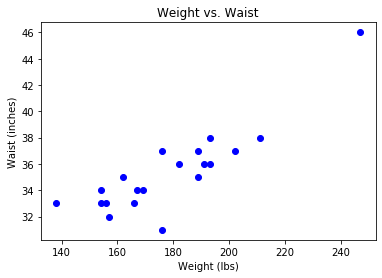

In [37]:
# Plot the data
plt.scatter(X, y, c ="blue")
plt.title("Weight vs. Waist")
plt.xlabel("Weight (lbs)")
plt.ylabel("Waist (inches)")
plt.show()

In [49]:
# Fit a model to the data
model = np.polyfit(X,y,1)
print('The linear model has equation of:')
print('y = ',model[0],'x + ',model[1]) # intercept/constant
#print(model[1]) # x coefficient

The linear model has equation of:
y =  0.11285699485443927 x +  15.243740718997135


In [52]:
# Use the model to predict my waist size
predict = np.poly1d(model)
myWeight = 210
predict(myWeight)

38.94370963842938

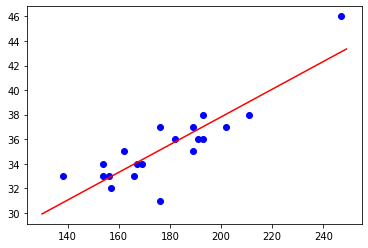

In [47]:
# Predict a range of values between 130 lbs and 250 lbs
X_pred = range(130,250) # Integers between low and high
y_pred = predict(X_pred) # Predicted values for each of these
# Plot both the original data points and the predicted line
plt.scatter(X,y, c = 'blue') # Original data
plt.plot(X_pred,y_pred, c = 'red') # Predicted linear line
plt.show()

In [53]:
# How good?
from sklearn.metrics import r2_score # Coefficient of determination (R^2)
# Caculate this metric using the original y and the predicted y
r2_score(y,predict(X))

0.7573237354913916